In [2]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from mpl_toolkits.mplot3d import Axes3D


import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

import warnings
warnings.filterwarnings('ignore')
import psycopg2

sns.set_style('darkgrid')
#Here we will just create a random series with seasonality and a slight trend
conn = psycopg2.connect(database="GEOL", user="NurislamovAI",
    password="556784", host="geoserver.mosecom.ru", port=5432)
cur = conn.cursor()
sql = "SELECT date, water_depth from \"Automatic_logs\" where well_id=177039 order by date"
dat = pd.read_sql_query(sql, conn)

dat['date'] = pd.to_datetime(dat['date'], format='%Y-%m-%d %H:%M:%S')
data = dat.set_index('date')
# data = data.asfreq('3H')
# data = data.sort_index()
# data = data.interpolate(method ='linear', limit_direction ='forward')
data.plot()

OperationalError: could not translate host name "geoserver.mosecom.ru" to address: Name or service not known


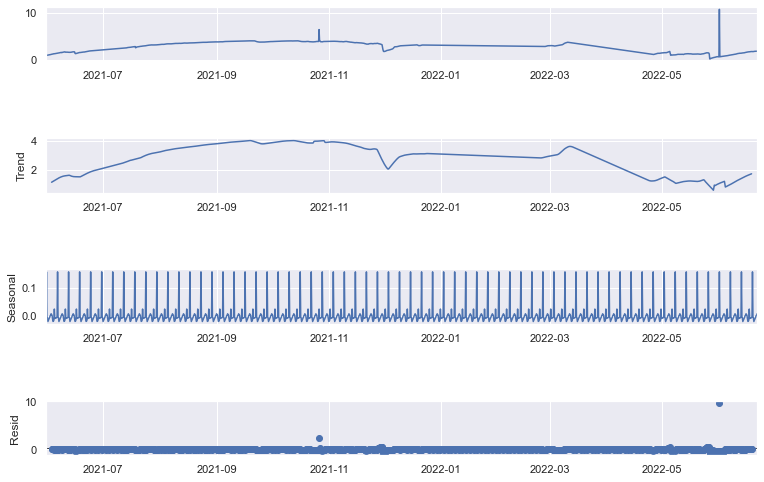

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

plt.rc('figure',figsize=(12,8))
plt.rc('font',size=50)

result = seasonal_decompose(data,model='additive')
fig = result.plot()

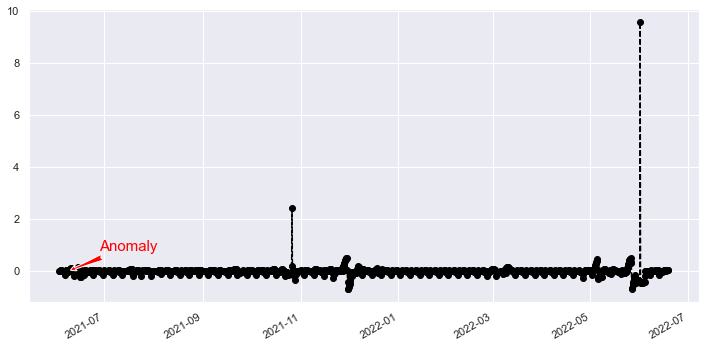

In [126]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)
fig, ax = plt.subplots()
x = result.resid.index
y = result.resid.values
ax.plot_date(x, y, color='black',linestyle='--')
ax.annotate('Anomaly', (mdates.date2num(x[35]), y[35]), xytext=(30, 20),
          textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))
fig.autofmt_xdate()
plt.show()

<AxesSubplot:xlabel='date'>

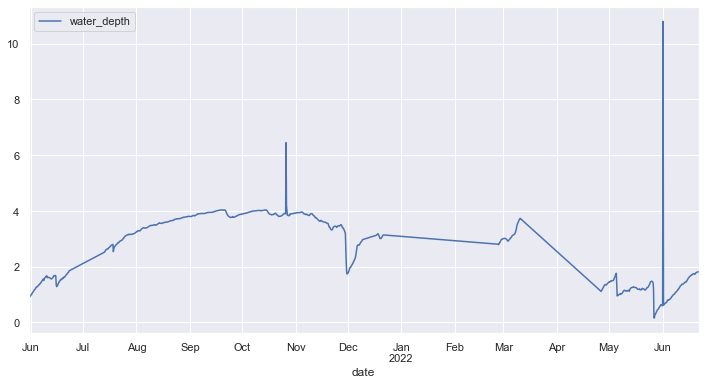

In [127]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)
data.plot()

In [128]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data.values.reshape(-1, 1))
data_a = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data_a)

IsolationForest(contamination=0.01)

In [129]:
outliers_fraction = float(.01)

In [130]:
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data.values.reshape(-1, 1))
data_a = pd.DataFrame(np_scaled)

In [131]:
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data_a) 

IsolationForest(contamination=0.01)

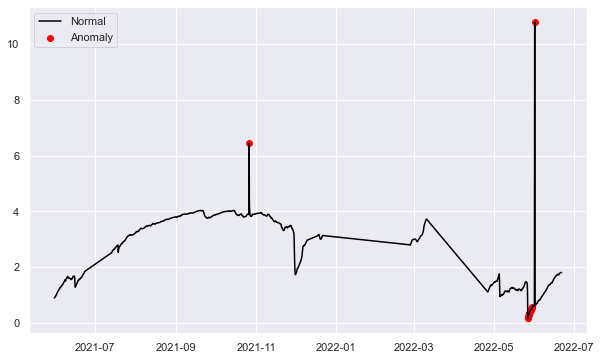

In [132]:
data['anomaly'] = model.predict(data_a)

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = data.loc[data['anomaly'] == -1, ['water_depth']] #anomaly

ax.plot(data.index, data['water_depth'], color='black', label = 'Normal')
ax.scatter(a.index,a['water_depth'], color='red', label = 'Anomaly')
plt.legend()
plt.show();